# Importar librerías

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import session_info
import upsetplot
import os 
from pathlib import Path 

c:\Users\calde\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\calde\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [4]:
Path(".").resolve() #traeme la ruta hasta aquí

WindowsPath('C:/Users/calde/OneDrive/Escritorio/cookiecutter-plantilla/hola/notebooks')

In [5]:
root_dir = Path(".").resolve().parent #parent es como los .. en la terminal (devuelve la carpeta anterior)
root_dir

WindowsPath('C:/Users/calde/OneDrive/Escritorio/cookiecutter-plantilla/hola')

In [6]:
filename = "best-selling-books.csv" #creamos variable con el nombre del archivo que queremos extraer

In [7]:
file_path = os.path.join(root_dir, "data", "raw", filename) #una las palabras dentro con / para crear la ruta de la carpeta
file_path

'C:\\Users\\calde\\OneDrive\\Escritorio\\cookiecutter-plantilla\\hola\\data\\raw\\best-selling-books.csv'

In [8]:
dataframe = pd.read_csv(file_path, sep=";", encoding="utf-8") #sep (por que están separados los datos o columnas, en este caso ;) 
# enonding (identificar caracteres del español especiales como ñ y tildes) y otra coma con n_rows = y la cantidad de filas que quiero ver)
dataframe.head(10) #vemos las primeras 10 filas de la tabla o dataframe 

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859.0,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943.0,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997.0,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939.0,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791.0,100.0,Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937.0,100.0,Fantasy
6,The Lion and the Witch and the Wardrobe,C. S. Lewis,English,1950.0,85.0,"Fantasy, Children's fiction"
7,She: A History of Adventure,H. Rider Haggard,English,1887.0,83.0,Adventure
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992.0,80.0,Detective
9,The Da Vinci Code,Dan Brown,English,2003.0,NaN,Mystery thriller


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              173 non-null    object 
 3   First published                173 non-null    float64
 4   Approximate sales in millions  162 non-null    float64
 5   Genre                          117 non-null    object 
dtypes: float64(2), object(4)
memory usage: 8.3+ KB


# Importar funciones personalizadas


In [10]:
%run APIPandas.ipynb

# Tabulación de valores faltantes

In [11]:
dataframe.isna()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
169,False,False,False,False,True,True
170,False,False,False,False,False,True
171,False,False,False,False,False,True
172,False,False,False,False,False,True


## Resumen valores faltantes

In [12]:
dataframe.shape

(174, 6)

### Resumen observaciones (completas vs faltantes)

In [13]:
print("valores completos ", dataframe.missing.number_complete())
print("valores incompletos ", dataframe.missing.number_missing())

valores completos  973
valores incompletos  71


### Resumen observaciones por variables

In [14]:
dataframe.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,Book,0,174,0.000000
1,Author(s),0,174,0.000000
2,Original language,1,174,0.574713
3,First published,1,174,0.574713
4,Approximate sales in millions,12,174,6.896552
5,Genre,57,174,32.758621


### Resumen general observaciones en mi tabla

In [15]:
dataframe.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,2,33.333333
1,1,2,33.333333
2,12,1,16.666667
3,57,1,16.666667


### Agrupando valores faltantes por bloque

In [16]:
(
    dataframe.
    missing.
    missing_variable_span(
        variable="Genre",
        span_every=35
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,34,2.857143,97.142857
1,1,0,35,0.000000,100.000000
2,2,1,34,2.857143,97.142857
3,3,23,12,65.714286,34.285714
4,4,32,2,94.117647,5.882353


# Visualización valores faltantes

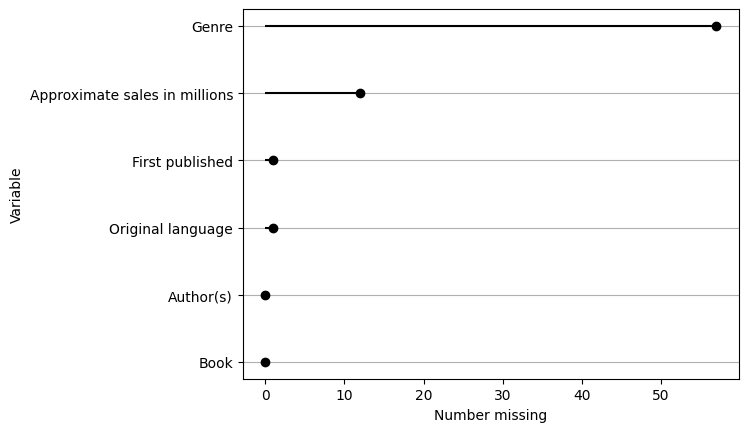

In [17]:
dataframe.missing.missing_variable_plot()

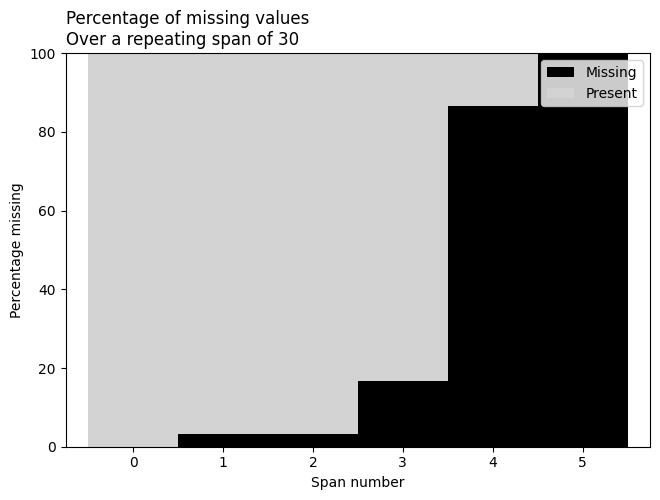

In [18]:
(
    dataframe
    .missing
    .missing_variable_span_plot(
        variable="Genre",
        span_every=30,
        rot= 0
    )
)

<AxesSubplot:>

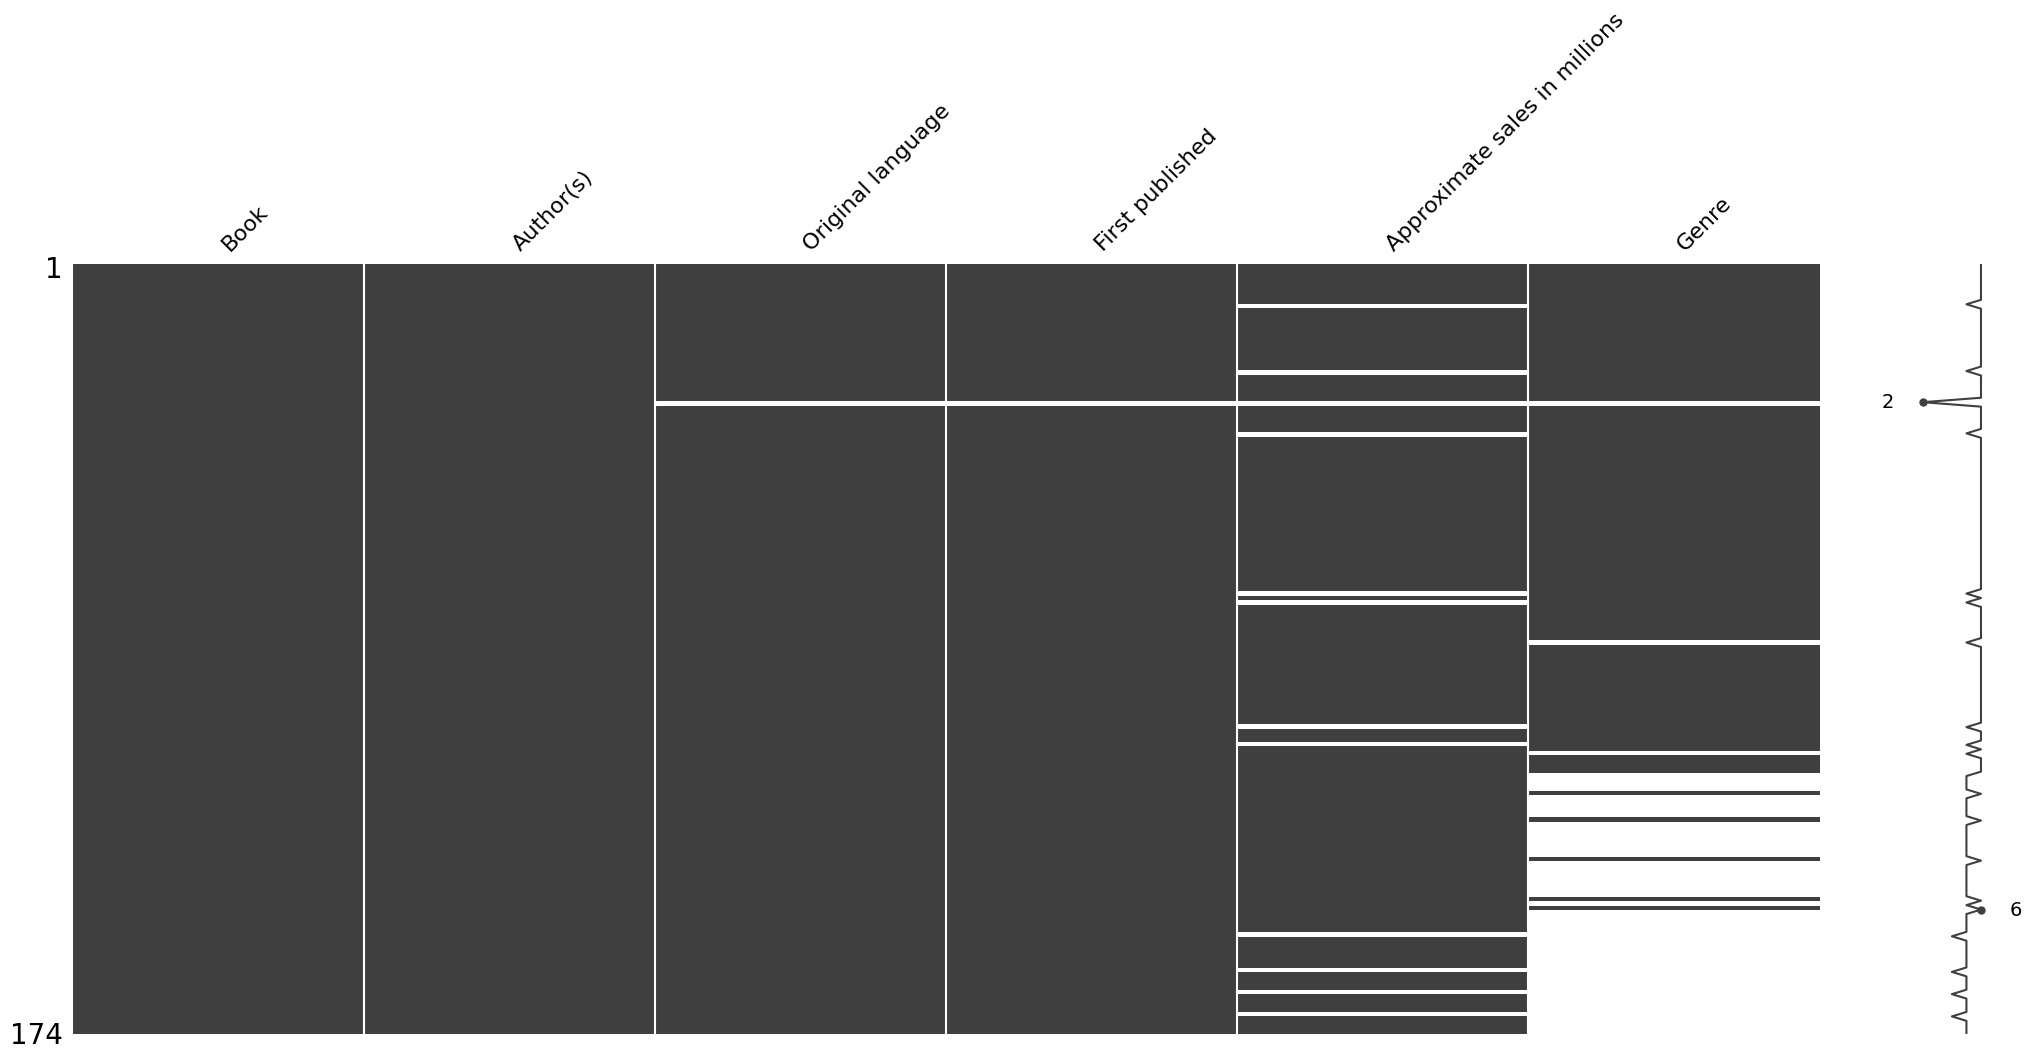

In [19]:
missingno.matrix(df = dataframe) 

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

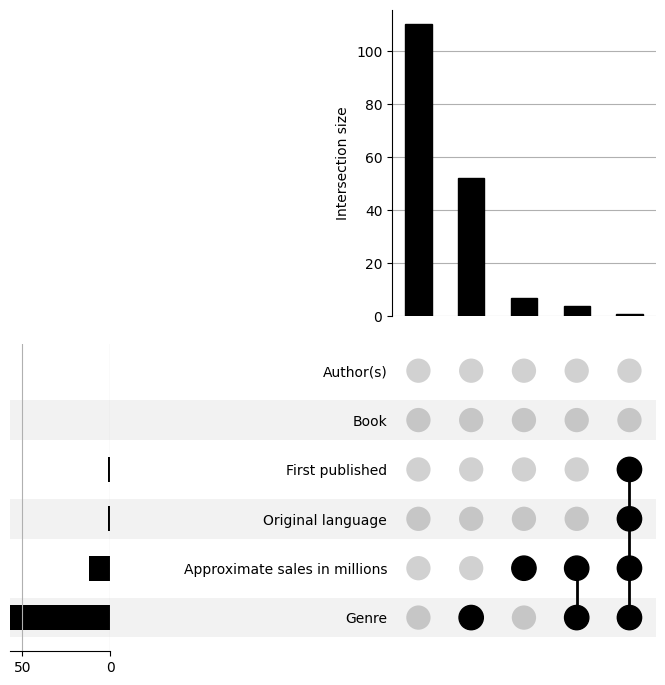

In [20]:
(
    dataframe
    .missing
    .missing_upsetplot(
        #None para ver todas o ["variable1","variable2"..,"variablen"]
        variables=None,
        element_size=50
    )
)

# Codificación de valores faltantes
### Cadenas de texto

In [21]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

### Números

In [22]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### DataFrame con valores faltantes

In [47]:
Dataframe_example_missing = pd.DataFrame.from_dict(
    dict(
        A = ["missing", -9999, "NULL", -9, "HOLA", "CHAO"],
        B = ["Z", -101, "N/A", 88, "J", "K"],
        C = [-9, -99, -999, -9999, 99, -1],
        D = ["?", "?", "NA", 77, "E", "F"]
    )
)

Dataframe_example_missing

,A,B,C,D
0,missing,Z,-9,?
1,-9999,-101,-99,?
2,NULL,N/A,-999,NA
3,-9,88,-9999,77
4,HOLA,J,99,E
5,CHAO,K,-1,F


In [48]:
Dataframe_example_missing.missing.number_missing()
# arroja cero debido a que no reconoce los diferentes tipos de datos faltantes

0

### Sustituyendo valores 

In [49]:
out_name = "missing_data_example_df.csv"  
out_path = os.path.join(root_dir,"data","processed", out_name)
Dataframe_example_missing.to_csv(out_path)

In [50]:
file_path_processed = os.path.join(root_dir, "data", "processed", 
                                   "missing_data_example_df.csv") 
file_path_processed

'C:\\Users\\calde\\OneDrive\\Escritorio\\cookiecutter-plantilla\\hola\\data\\processed\\missing_data_example_df.csv'

In [51]:
pd.read_csv(
    file_path_processed,
    na_filter=True,
    na_values=[-99, -1]
)

,Unnamed: 0,A,B,C,D
0,0,missing,Z,-9.0,?
1,1,-9999,-101,NaN,?
2,2,NaN,NaN,-999.0,NaN
3,3,-9,88,-9999.0,77
4,4,HOLA,J,99.0,E
5,5,CHAO,K,NaN,F


In [52]:
(
    Dataframe_example_missing
    .replace(
        to_replace=[-99, 'NA'],
        value= np.nan
    )
)
# sustituye todos los valores -99 y NA por nan desde el dataframe

,A,B,C,D
0,missing,Z,-9.0,?
1,-9999,-101,NaN,?
2,NULL,N/A,-999.0,NaN
3,-9,88,-9999.0,77
4,HOLA,J,99.0,E
5,CHAO,K,-1.0,F


In [54]:
(
    Dataframe_example_missing
    .replace(
        to_replace={
            'C':{
                -99:np.nan
            }
        }
    )
)
# Sustituye los valores -99 por nan solo en la variable x del dataframe

,A,B,C,D
0,missing,Z,-9.0,?
1,-9999,-101,NaN,?
2,NULL,N/A,-999.0,NA
3,-9,88,-9999.0,77
4,HOLA,J,99.0,E
5,CHAO,K,-1.0,F


# Conversión de valores faltantes implícitos en explícitos

In [55]:
Dataframe_example_impl_to_expl = pd.DataFrame.from_dict(
    data={
        "Name": ["Luis", "Luis", "Camilo", "Anita"],
        "Product": ["sandwich", "hamburger", "pizza", "ice cream"],
        "Price": [np.nan, 100, 50, 45]
    }
)

Dataframe_example_impl_to_expl

,Name,Product,Price
0,Luis,sandwich,NaN
1,Luis,hamburger,100.0
2,Camilo,pizza,50.0
3,Anita,ice cream,45.0


### Pivotar la tabla de datos

In [57]:
(
    Dataframe_example_impl_to_expl
    .pivot_wider(
        index="Name",        # variable nombre como filas
        names_from="Product",   # variable time como columnas
        values_from="Price"  # variable value como valores de la tabla
    )
)

,Name,hamburger,ice cream,pizza,sandwich
0,Anita,NaN,45.0,NaN,NaN
1,Camilo,NaN,NaN,50.0,NaN
2,Luis,100.0,NaN,NaN,NaN


### Cuantificar ocurrencias de N-tuplas

In [58]:
(
    Dataframe_example_impl_to_expl
    .value_counts(
        subset=["Name"]   # cuenta los valores asociados a los nombres
    )
    .reset_index(name="n")  # asigna n como indice del conteo
    .query("n < 3")         # condicion a cumplir por n para que se muestre en la tabla
)

,Name,n
0,Luis,2
1,Anita,1
2,Camilo,1


### Exponer filas faltantes implícitas en explícitas

In [59]:
# Rellena los datos faltantes que le indiquemos
(
    Dataframe_example_impl_to_expl
    # janitor
    .complete(
        "Name",
        "Product"
    )
)

,Name,Product,Price
0,Luis,sandwich,NaN
1,Luis,hamburger,100.0
2,Luis,pizza,NaN
3,Luis,ice cream,NaN
4,Camilo,sandwich,NaN
5,Camilo,hamburger,NaN
6,Camilo,pizza,50.0
7,Camilo,ice cream,NaN
8,Anita,sandwich,NaN
9,Anita,hamburger,NaN


In [60]:
# limitar los datos que quieres mostrar
(
    Dataframe_example_impl_to_expl
    .complete( # formato diccionario con as variables y valores a mostrar
        {'Name': ['Luis', 'Camilo']},
        {'Product': ['hamburger', 'pizza']},
        sort=True # ordena los valores de manera que primero muestra los pasados y luego el resto
    )
)

,Name,Product,Price
0,Camilo,hamburger,NaN
1,Camilo,pizza,50.0
2,Luis,hamburger,100.0
3,Luis,pizza,NaN
4,Luis,sandwich,NaN
5,Anita,ice cream,45.0


In [61]:
(
    Dataframe_example_impl_to_expl
    .complete(
        'Name',
        'Product',
        fill_value= np.nan  # puedes asignar el valor que desees. Por defecto asigna nan
    )
)

,Name,Product,Price
0,Luis,sandwich,NaN
1,Luis,hamburger,100.0
2,Luis,pizza,NaN
3,Luis,ice cream,NaN
4,Camilo,sandwich,NaN
5,Camilo,hamburger,NaN
6,Camilo,pizza,50.0
7,Camilo,ice cream,NaN
8,Anita,sandwich,NaN
9,Anita,hamburger,NaN


In [62]:
(
    Dataframe_example_impl_to_expl
    .complete(
        'Name',
        'Product',
        fill_value=0,
        explicit=False
    )
)

,Name,Product,Price
0,Luis,sandwich,NaN
1,Luis,hamburger,100.0
2,Luis,pizza,0.0
3,Luis,ice cream,0.0
4,Camilo,sandwich,0.0
5,Camilo,hamburger,0.0
6,Camilo,pizza,50.0
7,Camilo,ice cream,0.0
8,Anita,sandwich,0.0
9,Anita,hamburger,0.0
